In [1]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


# Trajectory functions

In [2]:
def point_to_point_traj(x1, x2, v1, v2, delta_t):
  t = np.linspace(0, delta_t, 100)  
  a0 = x1
  a1 = v1
  a2 = (3*x2 - 3*x1 - 2*v1*delta_t - v2 * delta_t) / (delta_t**2)
  a3 = (2*x1 + (v1 + v2) * delta_t  - 2 * x2) / (delta_t**3)

  polynomial = a0 + a1 * t + a2 * t**2 + a3 * t**3
  derivative = a1 + 2*a2 * t + 3 * a3 * t**2
  return polynomial, derivative


def piecewise2D (X,Y, Vx, Vy, T):
    theta_x, theta_y, dx, dy = [], [], [], []

    for i in range(len(P)-1):          
        theta_xi, dxi = point_to_point_traj(X[i], X[i+1], Vx[i], Vx[i+1], T[i+1] - T[i])
        theta_yi, dyi = point_to_point_traj(Y[i], Y[i+1], Vy[i], Vy[i+1], T[i+1] - T[i])

        theta_x += theta_xi.tolist()
        theta_y += theta_yi.tolist()
        dx += dxi.tolist()
        dy += dyi.tolist()

        plot(theta_xi, theta_yi)
    return theta_x, theta_y, dx, dy

# Plotting functions

In [3]:
# Plotting
def plot_points():
    plot(X,Y, '--')
    plot(X,Y, 'o')
    quiver(X,Y, Vx, Vy, color='r')
    
# Speed
def plot_speed():
    speed = np.sqrt(np.array(dx)**2 + np.array(dy)**2)
    plot(speed)

# Example 1

In [4]:
##### Requirements for the trajectory

# Waypoints
p1 = [0.,0]
p2 = [2,3]
p3 = [4,5]
p4 = [5,-1]
p5 = [1,-1]

# Velocities
v1 = [0,-0.001]
v2 = [-1,1]
v3 = [1,0]
v4 = [-1,1]
v5 = [0,-0.001]


v1 = [0,-0.001]
v2 = [1,1]
v3 = [1,0]
v4 = [1,1]
v5 = [0,-0.001]


# Time
t1 = 0
t2 = 12
t3 = 22
t4 = 32
t5 = 42

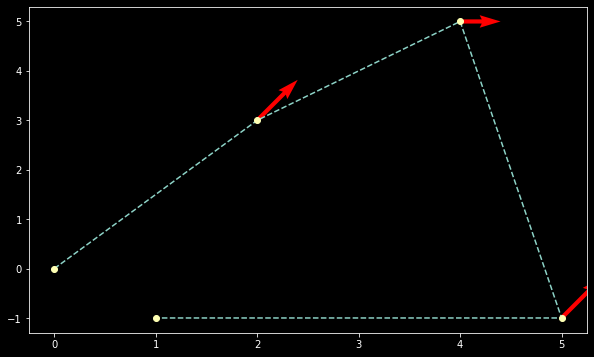

In [5]:
# Convert the initial conditions to a vector form
P = np.vstack((p1, p2, p3, p4, p5))
V = np.vstack((v1, v2, v3, v4, v5))
T = [t1, t2, t3, t4, t5]

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]


    
plot_points()

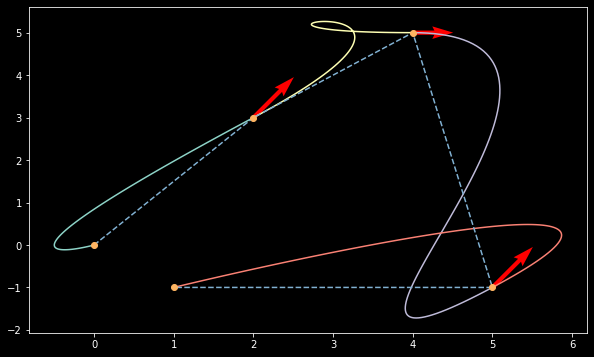

In [6]:
# Plot the trajectory that passes trhough the desired waypoints
theta_x, theta_y, dx, dy = piecewise2D(X,Y, Vx, Vy, T)
plot_points()

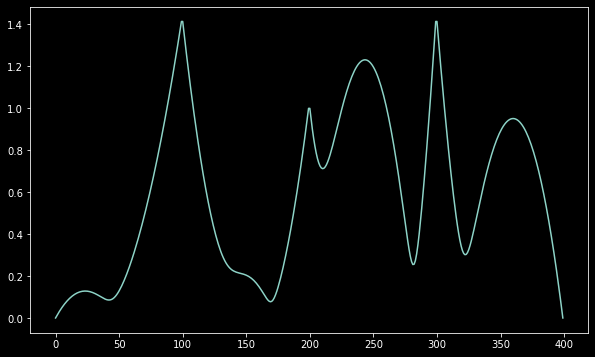

In [7]:
# Plot speed
plot_speed()

# Example 2

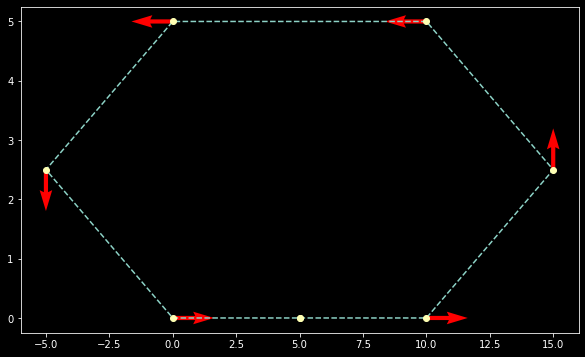

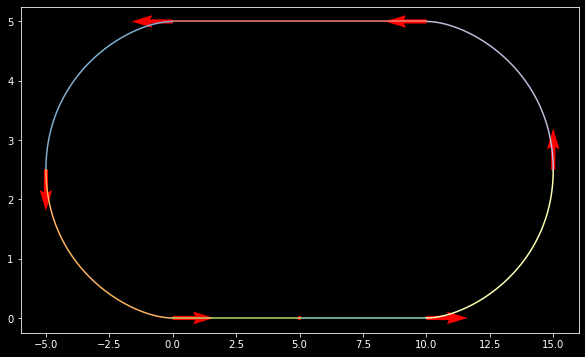

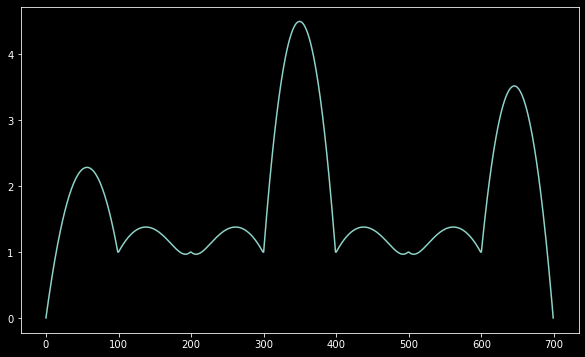

In [8]:
##### Requirements for the trajectory

# Waypoints
p1 = [5.,0]
p2 = [10, 0]
p3 = [15,2.5]
p4 = [10,5]
p5 = [0,5]
p6 = [-5,2.5]
p7 = [0,0]
p8 = [5,0]

# Velocities
v1 = [0.0001,0.]
v2 = [1,0]
v3 = [0,1]
v4 = [-1,0]
v5 = [-1,0]
v6 = [0,-1]
v7 = [1,0]
v8 = [0.0001,0]

# Time
t1 = 0
t2 = t1 + 3
t3 = t2 + 5
t4 = t3 + 5
t5 = t4 + 3
t6 = t5 + 5
t7 = t6 + 5
t8 = t7 + 2


# Grouping
P = np.vstack((p1, p2, p3, p4, p5, p6, p7, p8))
V = np.vstack((v1, v2, v3, v4, v5, v6, v7, v8))
T = [t1, t2, t3, t4, t5, t6, t7, t8]

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]

# Plotting
plot_points()
show()

# Piecewise function
theta_x, theta_y, dx, dy = piecewise2D(X,Y, Vx, Vy, T)

# Plotting
quiver(X,Y, Vx, Vy, color='r')  #

show()
plot_speed()

# Moving the point in time
Be sure that you have JSAnimation installed. If not pip install JSAnimation

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    ax.plot(theta_x, theta_y, 'b--')
    
    # Initial conditions
    ax.plot(X,Y, 'go')
    ax.quiver(X,Y, Vx, Vy, color='0.4', scale=20)
        
    # Dynamic position
    ax.plot(theta_x[t], theta_y[t], 'ro', markersize=10)
       
    # Velocity vector
    ax.quiver([theta_x[t]], [theta_y[t]], [dx[t]], [dy[t]], color='r', units='xy', scale=10/np.linalg.norm([theta_x[t], theta_y[t]]))
    

anim = animation.FuncAnimation(fig, animate, frames=int(len(theta_x)/1), interval=25)


HTML(anim.to_jshtml())

In [ ]:
# Export the movie to mp4
Be sure that you have the ffmpeg codec installed (sudo apt-get install ffmpeg).

In [ ]:
anim.save('trajectory2.mp4', dpi=300)